# Experimento 1: _GridSearch_ no KNN

- Busca em grade para ```k``` variando de: $[3:7]$;
- Pensar em como mostrar acerto por frequência do motor;

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

## Busca em grade

In [2]:
fs20_df = pd.read_csv('./csvs/fs20.csv')
target_s = fs20_df.pop('target')

results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            KNeighborsClassifier()),
    param_grid={'kneighborsclassifier__n_neighbors':np.arange(1, 10)},
    n_jobs=-1,
    cv=StratifiedKFold(
        n_splits=10,
        # random_state=0,
        shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_df = pd.DataFrame(results)
results_df.to_csv('./csvs/04-gs_knn.csv')
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020400,0.009873,0.041955,0.011417,1,{'kneighborsclassifier__n_neighbors': 1},0.969231,0.969112,0.965251,0.992278,0.984556,0.984556,0.996139,0.996139,0.988417,0.996139,0.984182,0.011497,1
1,0.014917,0.005154,0.040612,0.021705,2,{'kneighborsclassifier__n_neighbors': 2},0.965385,0.972973,0.969112,0.984556,0.984556,0.976834,0.980695,0.980695,0.980695,0.988417,0.978392,0.006925,2
2,0.016741,0.005927,0.040636,0.010757,3,{'kneighborsclassifier__n_neighbors': 3},0.973077,0.972973,0.961390,0.988417,0.965251,0.980695,0.980695,0.969112,0.988417,0.972973,0.975300,0.008665,3
3,0.014761,0.003633,0.039218,0.011177,4,{'kneighborsclassifier__n_neighbors': 4},0.965385,0.976834,0.965251,0.980695,0.976834,0.976834,0.972973,0.969112,0.976834,0.976834,0.973759,0.005100,4
4,0.016160,0.003234,0.044243,0.008321,5,{'kneighborsclassifier__n_neighbors': 5},0.965385,0.965251,0.961390,0.972973,0.949807,0.976834,0.969112,0.961390,0.976834,0.969112,0.966809,0.007758,5
5,0.013368,0.001836,0.038970,0.002904,6,{'kneighborsclassifier__n_neighbors': 6},0.965385,0.965251,0.953668,0.972973,0.961390,0.972973,0.965251,0.965251,0.976834,0.961390,0.966037,0.006413,6
6,0.016214,0.004159,0.048362,0.012636,7,{'kneighborsclassifier__n_neighbors': 7},0.961538,0.972973,0.949807,0.976834,0.957529,0.969112,0.957529,0.953668,0.969112,0.938224,0.960633,0.011165,7
7,0.015444,0.002807,0.046474,0.008362,8,{'kneighborsclassifier__n_neighbors': 8},0.961538,0.953668,0.949807,0.969112,0.957529,0.976834,0.957529,0.949807,0.969112,0.934363,0.957930,0.011517,8
8,0.015635,0.002236,0.042787,0.007791,9,{'kneighborsclassifier__n_neighbors': 9},0.961538,0.957529,0.949807,0.976834,0.942085,0.976834,0.957529,0.938224,0.972973,0.930502,0.956386,0.015454,9


param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
1,0.984182,0.011497,1
2,0.978392,0.006925,2
3,0.975300,0.008665,3
4,0.973759,0.005100,4
5,0.966809,0.007758,5
6,0.966037,0.006413,6
7,0.960633,0.011165,7
8,0.957930,0.011517,8
9,0.956386,0.015454,9


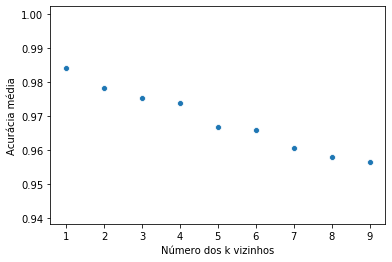

In [3]:
sns.scatterplot(
    data=results_df,
    x='param_kneighborsclassifier__n_neighbors',
    y='mean_test_score'
    ).set(
        xlabel='Número dos k vizinhos',
        ylabel='Acurácia média')

results_df[[
    'param_kneighborsclassifier__n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index()

## Busca em grade manual

In [4]:
random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

acc = []
X, y = fs20_df.values, target_s.values

for k in range(1, 10):

    acc_scores = []

    for seed in random_seeds:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Adicionando resultados à respectiva lista
        acc_scores.append(
            make_pipeline(
                StandardScaler(),
                KNeighborsClassifier(n_neighbors=k)
                ).fit(
                    X_train,
                    y_train
                    ).score(
                        X_test,
                        y_test))
    
    acc.append(acc_scores)

scores_df = pd.DataFrame(data=acc, index=range(1, 10)).transpose()
scores_df

seeds: [5006 1458 1839 4764 5975 3970 6434 5427 2509 2664 5337 4519 6914 2736
 3634 5929 4564 3791  914 2340 1535 5489 6399  916 4539 6486 2757 5744
 3991 3807]


,1,2,3,4,5,6,7,8,9
0,0.992293,0.980732,0.978805,0.974952,0.967245,0.965318,0.967245,0.961464,0.955684
1,0.971098,0.965318,0.973025,0.971098,0.969171,0.969171,0.965318,0.961464,0.957611
2,0.994220,0.980732,0.984586,0.969171,0.965318,0.955684,0.955684,0.951830,0.947977
3,0.986513,0.986513,0.980732,0.982659,0.974952,0.976879,0.969171,0.973025,0.973025
4,0.976879,0.971098,0.965318,0.965318,0.959538,0.965318,0.946050,0.944123,0.932563
5,0.974952,0.973025,0.973025,0.971098,0.963391,0.957611,0.955684,0.949904,0.946050
6,0.990366,0.988439,0.978805,0.974952,0.967245,0.971098,0.957611,0.965318,0.942197
7,0.982659,0.980732,0.974952,0.969171,0.971098,0.969171,0.965318,0.965318,0.957611
8,0.984586,0.976879,0.978805,0.978805,0.971098,0.974952,0.965318,0.963391,0.959538
9,0.986513,0.980732,0.976879,0.976879,0.973025,0.974952,0.957611,0.959538,0.951830


,1,2,3,4,5,6,7,8,9
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.982787,0.976301,0.975145,0.972319,0.967887,0.966153,0.960629,0.958446,0.953629
std,0.006498,0.005969,0.006225,0.005691,0.007321,0.007500,0.008279,0.008976,0.011336
min,0.971098,0.963391,0.963391,0.959538,0.951830,0.949904,0.946050,0.938343,0.932563
25%,0.977360,0.973025,0.973025,0.969171,0.965318,0.961464,0.954239,0.951830,0.942197
50%,0.982659,0.976879,0.975915,0.972062,0.969171,0.967245,0.962428,0.959538,0.955684
75%,0.986513,0.980732,0.978805,0.974952,0.971098,0.970617,0.967245,0.963391,0.962428
max,0.994220,0.988439,0.988439,0.982659,0.982659,0.980732,0.973025,0.974952,0.974952


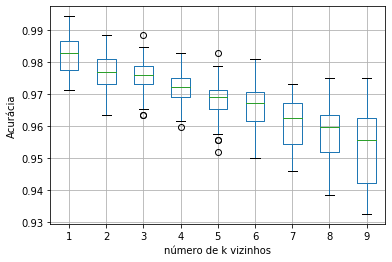

In [5]:
scores_df.boxplot().set(
    xlabel='número de k vizinhos',
    ylabel='Acurácia'
)

scores_df.describe()